In [1]:
## La remise à niveau R qui vous est proposée s'appuie sur un jeu de données 
## issues des travaux de recherche dont les références vous sont fournies dans le dossier Docpdf
## en plus de supports introductif au langage R et à RStudio 

##################################################################
##
## I. définir le dossier de travail, import des librairies (packages)
##                  lecture et chargement des données
##
##################################################################

### Se positionner dans le répertoire des données ###
## vous changer le 'work directory' dans RStudio via le menu

setwd('../BData') ## A adapter en fonction de la localisation du dossier

## Pour vérifier que R 'regarde' dans le bon répertoire on peut utiliser la fonction dir() 

dir()

### chargement des paquets R pour lire et manipuler les données spatiales 
library(sf) ## lecture et écriture de données vecteurs 
## library(rgdal) ## lecture de données vecteurs

[1] "ptsampleFenayL93.cpg" "ptsampleFenayL93.dbf" "ptsampleFenayL93.prj"
[4] "ptsampleFenayL93.qpj" "ptsampleFenayL93.shp" "ptsampleFenayL93.shx"

Linking to GEOS 3.10.2, GDAL 3.4.1, PROJ 8.2.1; sf_use_s2() is TRUE



In [37]:
##########################################################################
## Charge l'ensemble des pts echantillonnés sur la zone atelier de Fenay
## utilisation de la fonction st_read du package sf
## pour lister l'ensemble des fonctions du package sf: help(package = "sf")

## ?st_read ## pour afficher l'aide sur la function st_read

mydata <- st_read("ptsampleFenayL93.shp") ## Lecture et chargement des données


## mydata <- readOGR("ptsampleFenayL93.shp")
## affiche le header des données

Reading layer `ptsampleFenayL93' from data source 
  `/home/thierry/works/R4R2D2C_2022_2023/BData/ptsampleFenayL93.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 269 features and 16 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 853766.6 ymin: 6681507 xmax: 858712.6 ymax: 6684948
Projected CRS: RGF93 v1 / Lambert-93


In [38]:
## type de l'objet mydata
class(mydata)
## structure de l'objet mydata
str(mydata)

[1] "sf"         "data.frame"

Classes ‘sf’ and 'data.frame':	269 obs. of  17 variables:
 $ field_1   : chr  "Py_1_2011" "Py_100_2011" "Py_101_2011" "Py_102_2011" ...
 $ annee     : num  2011 2011 2011 2011 2011 ...
 $ SOC       : num  35 24.5 23 19.8 45.2 10.3 33.2 11 10.4 37.6 ...
 $ TN        : num  3.07 2.42 2.43 2.1 3.75 5.92 3.14 1.06 0.999 3.25 ...
 $ C_N       : num  11.4 10.1 9.48 9.44 12 1.74 10.6 10.4 10.4 11.6 ...
 $ PH        : num  6.78 8.1 7.5 7.51 8.06 8.25 8.2 6.78 7.75 8.13 ...
 $ Clay      : num  44.2 34.3 42 40.3 33 31 21.4 27.3 24.3 23.2 ...
 $ Sand      : num  4.5 15 8 11.6 10.1 5.6 14.4 7.9 6.5 11.8 ...
 $ XLB93     : num  857059 854843 858498 858283 855273 ...
 $ YLB93     : num  6684437 6682797 6682798 6682798 6682798 ...
 $ cat_cultur: chr  "Foret" "Hiver" "Ete" "Ete" ...
 $ Categories: chr  "pas_de_travail" "Travail_intermediaire" "Labour" "Labour" ...
 $ Shannon   : num  4.81 5.73 5.47 5.49 5.74 ...
 $ Evenness  : num  0.697 0.796 0.782 0.778 0.79 ...
 $ X1.Simpson: num  25.7 94.5 86.9 75

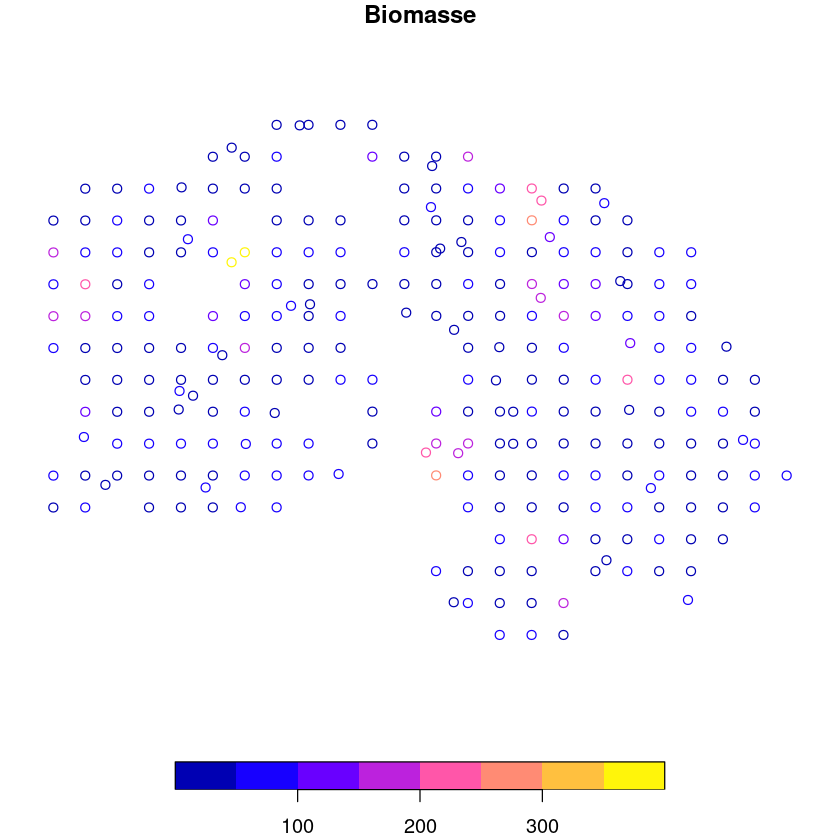

In [40]:
##################################################################
##
## II. Exploration des données :
##       - graphe les données pour la variable SOC (matière organique)
##       - trace l'histogramme pour la variable SOC
##       - Calcul des moments d'ordre 1 : min, max, moyenne, écart-type
##
##################################################################

## Graphe la variable Biomasse
plot(mydata["Biomasse"])

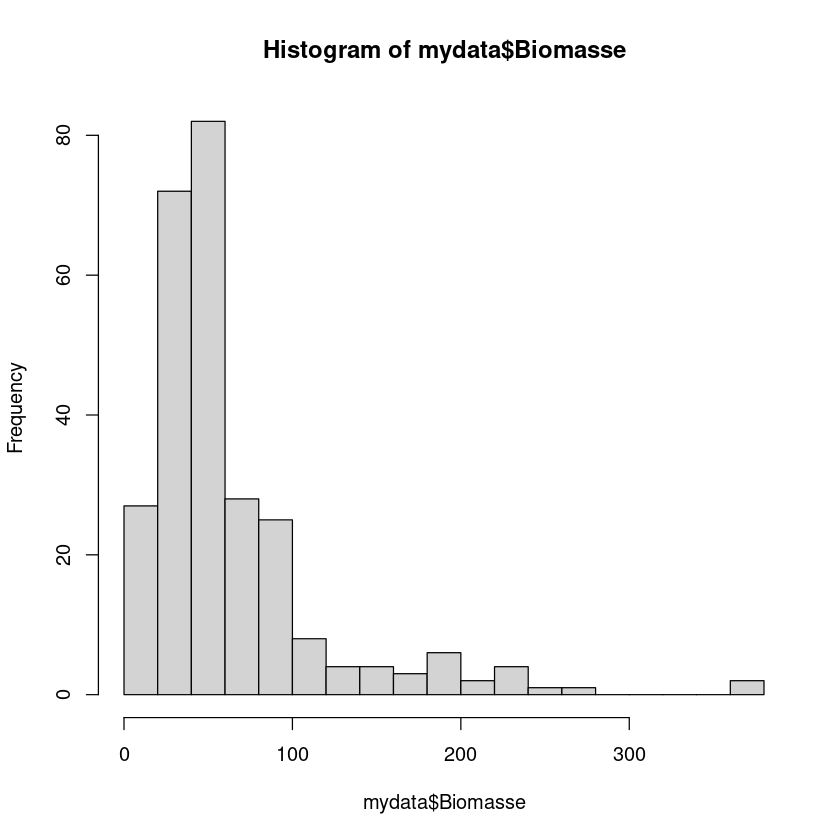

In [41]:
## gamme et distribution des valeurs pour la variable Biomasse
hist(mydata$Biomasse,breaks=15)

In [42]:
min(mydata$Biomasse);max(mydata$Biomasse)
range(mydata$Biomasse)
mean(mydata$Biomasse);sd(mydata$Biomasse)

[1] 2.3

[1] 370

[1]   2.3 370.0

[1] 64.82528

[1] 56.15489

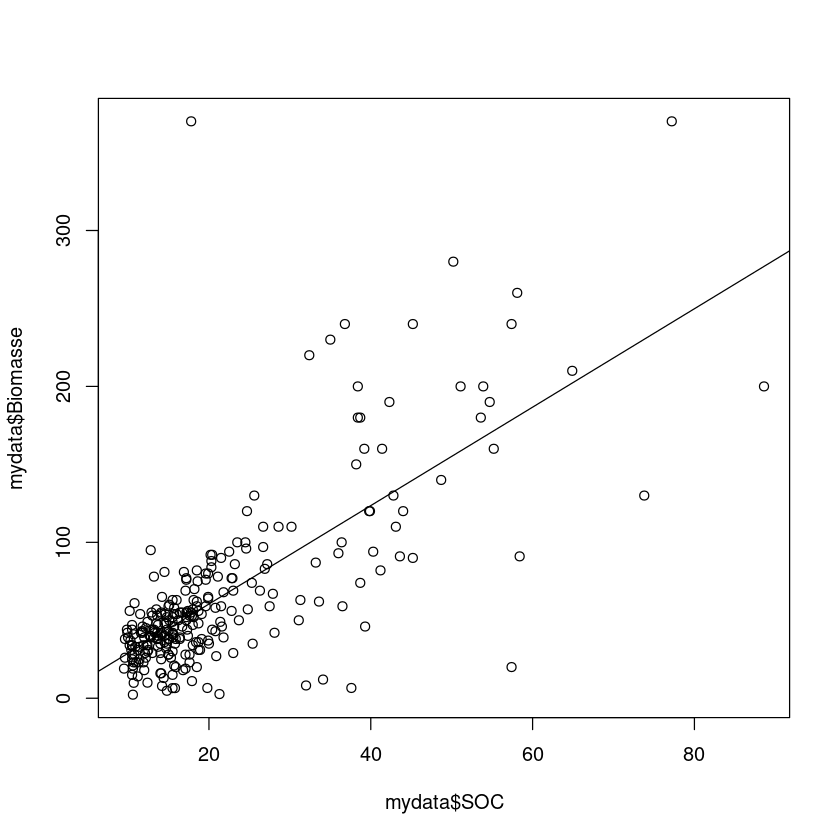

In [43]:
##################################################################
##
## III. Ajustement d'un modèle linéaire simple
##      métrique de la qualité de l'ajustement du modèle : r et R2
##      erreur quadratique moyenne associée à l'ajustement : RMSE
##
##################################################################

## scatterplot de SOC vs. Biomasse
plot(mydata$SOC,mydata$Biomasse)

## Ajustement d'un modèle linéaire
mylm <- lm(Biomasse~SOC, data = mydata)

## Trace la modèle linéaire ajusté
abline(mylm)


In [34]:
## résumé des paramètres et de la qualité de l'ajustement
summary(mylm)

## corrélation linéaire entre les deux variables
cor(mydata$Biomasse,mydata$SOC)

###############################################
###############################################
## Que déduire de ces résultats ?
## Commentaires ?


Call:
lm(formula = Biomasse ~ SOC, data = mydata)

Residuals:
    Min      1Q  Median      3Q     Max 
-158.49  -16.24   -0.87   12.55  316.50 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.6863     4.6089  -0.583     0.56    
SOC           3.1564     0.1848  17.082   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38.89 on 267 degrees of freedom
Multiple R-squared:  0.5222,	Adjusted R-squared:  0.5204 
F-statistic: 291.8 on 1 and 267 DF,  p-value: < 2.2e-16


[1] 0.7226226

In [44]:
## Calcule de la RMSE (Root Mean Squared Error) ou Erreur Quadratique Moyenne
RMSE <- sqrt(sum(mylm$residuals^2)/length(mylm$residuals))
RMSE

[1] 38.74444

In [16]:
##############################################################
##
## IV. Evaluation de la robustesse du modèle linéaire ajusté
##
## 1- estimateur cross validation : 1 échantillon d'entraînement (training sample) ~70%
##                                  1 échantillon de contrôle (control sample) ~30%
##
## 2- estimateur jackknife également appelée leave-one-out
###############################################################
dim(mydata) ## dimension de la table des données
ctrlsize <- floor(dim(mydata)[1]*0.3)
trainingsize <- dim(mydata)[1] - ctrlsize
ctrlsize ## nombre des données dans l'échantillon de contrôle
trainingsize ## nombre des données dans l'échanllion d'ajustement du modèle

## tirage aléatoire des données pour le contrôle
ctrl_sample <- sample(1:dim(mydata)[1], size=ctrlsize)

## copie de mydata et transformation en un objet dataframe
mydf <- mydata
st_geometry(mydf) <- NULL ## supression de la partie spatiale
class(mydf) ## mydf est maintenant un objet dataframe cela va simplifier le sous-échantillonnage

[1] 269  17

[1] 80

[1] 189

[1] "data.frame"

In [45]:
#########################################################################################
##
## Calcul du modèle d'entraînement
##
#########################################################################################
## Sélection des données pour paramétrer le modèle d'entrainement
training_mydf <- mydf[-ctrl_sample,]
## Sélection des données pour évaluer/controler le modèle
control_mydf <- mydf[ctrl_sample,]
## dimension de l'échantillon
dim(training_mydf)
dim(control_mydf)
## corrélation linéraire entre SOC vs Biomasse
cor(training_mydf$Biomasse,training_mydf$SOC)
## Ajustement du modèle linéraire à partie de l'échantillon d'entraînement
mydflm <- lm(Biomasse~SOC, data = training_mydf)

[1] 189  16

[1] 80 16

[1] 0.6079649

In [46]:
summary(mydflm) ## résumé de l'ajustement du modèle


Call:
lm(formula = Biomasse ~ SOC, data = training_mydf)

Residuals:
     Min       1Q   Median       3Q      Max 
-135.777  -13.788   -1.261    9.636  316.227 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    7.923      5.785    1.37    0.172    
SOC            2.576      0.246   10.47   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38.66 on 187 degrees of freedom
Multiple R-squared:  0.3696,	Adjusted R-squared:  0.3663 
F-statistic: 109.6 on 1 and 187 DF,  p-value: < 2.2e-16


In [47]:
coef(mydflm) ## Coefficient du modèle ajusté

(Intercept)         SOC 
   7.922903    2.575855

In [48]:
## Application du modèle ajusté sur les données de contrôle
## Biomassepredict = a x SOC + b 
control_mydf$Biomassepredict <- coef(mydflm)[2]*control_mydf$SOC + coef(mydflm)[1]

In [49]:
head(control_mydf)
tail(control_mydf)

,field_1,annee,SOC,TN,C_N,PH,Clay,Sand,XLB93,YLB93,cat_cultur,Categories,Shannon,Evenness,X1.Simpson,Biomasse,Biomassepredict
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
67,Py_162_2011,2011,21.3,2.12,10.10,8.09,36.0,11.9,855273.5,6683443,Hiver,Decompactage,5.827,0.797213,104.450,2.7,62.78861
106,Py_200_2011,2011,33.6,1.59,21.20,8.40,35.3,9.1,858068.6,6683873,Brassicacees,Travail_intermediaire,5.636,0.787162,98.660,62.0,94.47162
99,Py_193_2011,2011,57.4,5.03,11.40,7.91,46.4,11.4,853982.4,6683872,Foret,pas_de_travail,5.032,0.720297,27.540,240.0,155.77696
139,Py_231_2011,2011,21.4,2.02,10.60,8.27,20.2,11.3,856994.2,6684089,Ete,Labour,5.708,0.786646,89.534,49.0,63.04619
144,Py_236_2011,2011,20.3,1.44,14.10,5.09,8.0,5.8,854197.4,6684302,Foret,pas_de_travail,4.683,0.685990,20.619,88.0,60.21275
165,Py_257_2011,2011,15.3,1.62,9.44,8.32,42.8,7.2,855273.0,6684518,Brassicacees,Labour,5.500,0.777977,77.200,26.0,47.33348


,field_1,annee,SOC,TN,C_N,PH,Clay,Sand,XLB93,YLB93,cat_cultur,Categories,Shannon,Evenness,X1.Simpson,Biomasse,Biomassepredict
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
268,Py_98_2011,2011,12.9,1.32,9.85,7.35,33.1,5.7,854412.4,6682797,Hiver,Travail_intermediaire,5.589,0.781220,71.529,55,41.15143
18,Py_116_2011,2011,28.1,2.53,11.10,8.20,21.5,24.1,855259.8,6683004,Brassicacees,Labour,6.016,0.814577,121.262,42,80.30442
233,Py_65_2011,2011,17.9,1.73,10.40,8.26,37.9,11.8,855272.7,6682367,Hiver,Labour,5.636,0.788730,96.765,53,54.03070
261,Py_91_2011,2011,18.5,1.90,9.72,8.22,44.1,5.0,857208.4,6682583,Printemps,Labour,5.488,0.771082,70.400,62,55.57622
94,Py_189_2011,2011,27.5,2.83,9.74,7.38,61.7,2.0,856994.6,6683659,Hiver,Decompactage,5.367,0.764653,56.715,59,78.75891
254,Py_84_2011,2011,20.2,1.91,10.60,8.19,33.2,14.5,855272.9,6682583,Hiver,Travail_intermediaire,5.808,0.796029,98.912,92,59.95517


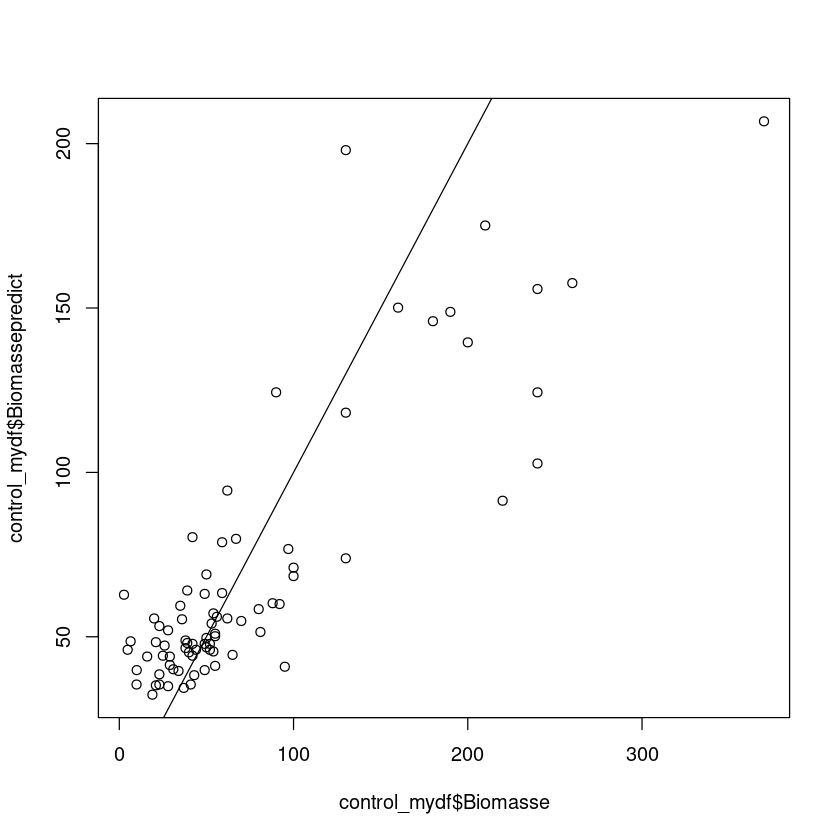

In [50]:
## Trace Biomasse mesurée vs Biomasse prédite par le modèle linéaire
plot(control_mydf$Biomasse, control_mydf$Biomassepredict) ## scatterplot
abline(0,1) ## trace la droite 1:1

In [51]:
## Evaluataion de la qualité du modèle
cor(control_mydf$Biomasse,control_mydf$Biomassepredict) ## coef corrélation linéaire
(cor(control_mydf$Biomasse,control_mydf$Biomassepredict))^2 ## coef détermination
RMSE <- sqrt(sum((control_mydf$Biomasse-control_mydf$Biomassepredict)^2)/dim(control_mydf)[1])
RMSE

[1] 0.8553098

[1] 0.7315549

[1] 41.84783

In [68]:
## Estimateur Jackknife
## charge la function myjack qui est dans le fichier funjack.R
source("/home/thierry/works/R4R2D2C_2022_2023/RCode/funjack.R")
## Visualisation de la function myjack
myjack


function (tmp) 
{
    cvdf <- tmp[, c("SOC", "Biomasse")]
    colnames(cvdf) <- c("Biomasse", "Biomassepredict")
    cvdf$Biomassepredict <- NA
    for (i in 1:nrow(tmp)) {
        t.cv <- tmp[-i, ]
        coeff.lm <- coefficients(lm(Biomasse ~ SOC, data = t.cv))
        cvdf[i, 2] <- coeff.lm[2] * tmp$SOC[i] + coeff.lm[1]
    }
    r2 <- cor(cvdf[, 1], cvdf[, 2], use = "complete.obs")^2
    rmse <- sqrt(mean((cvdf[, 1] - cvdf[, 2])^2, na.rm = T))
    bias <- mean(abs(cvdf[, 1] - cvdf[, 2]))
    resultats <- list(cvdata = cvdf, r2 = r2, RMSE = rmse, biais = bias)
    return(resultats)
}

In [69]:
## Evaluation du modèle linéaire avec la méthode jackknife
resujack <- myjack(mydf)

In [70]:
str(resujack)

List of 4
 $ cvdata:'data.frame':	269 obs. of  2 variables:
  ..$ Biomasse       : num [1:269] 35 24.5 23 19.8 45.2 10.3 33.2 11 10.4 37.6 ...
  ..$ Biomassepredict: num [1:269] 106.8 74.5 69.9 60 140.8 ...
 $ r2    : num 0.999
 $ RMSE  : num 51.6
 $ biais : num 43.5


In [91]:
##############################################################
##
## IV. Modèle multi-linéaire 
## - Sélection de variables (régresseurs) via des critères d'information : Akaike (AIC), critère d'information bayésien (BIC) R2 ajusté
## - Contribution des variables
###############################################################
## chargement de la librairie pour la sélection
library(leaps)
## chargement de la librairie pour estimer l'importance relative des variables sélectionnées
library(relaimpo)


In [72]:
head(training_mydf) ## utilise l'ensemble des variables numériques
## la fonction 
choix_variables <- regsubsets(Biomasse ~ TN + C_N + PH + Clay + SOC + Sand, 
                              data = training_mydf)

,field_1,annee,SOC,TN,C_N,PH,Clay,Sand,XLB93,YLB93,cat_cultur,Categories,Shannon,Evenness,X1.Simpson,Biomasse
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Py_1_2011,2011,35.0,3.070,11.40,6.78,44.2,4.5,857058.6,6684437,Foret,pas_de_travail,4.810,0.697131,25.743,230.0
3,Py_101_2011,2011,23.0,2.430,9.48,7.50,42.0,8.0,858497.9,6682798,Ete,Labour,5.469,0.782461,86.932,69.0
4,Py_102_2011,2011,19.8,2.100,9.44,7.51,40.3,11.6,858283.0,6682798,Ete,Labour,5.492,0.777978,75.408,6.6
7,Py_105_2011,2011,33.2,3.140,10.60,8.20,21.4,14.4,855488.2,6682798,Hiver,Travail_intermediaire,5.928,0.804411,90.926,87.0
8,Py_106_2011,2011,11.0,1.060,10.40,6.78,27.3,7.9,857853.3,6682798,Hiver,Travail_intermediaire,5.660,0.787929,76.525,23.0
9,Py_108_2011,2011,10.4,0.999,10.40,7.75,24.3,6.5,857638.5,6682798,Hiver,Travail_intermediaire,5.616,0.785689,81.258,31.0


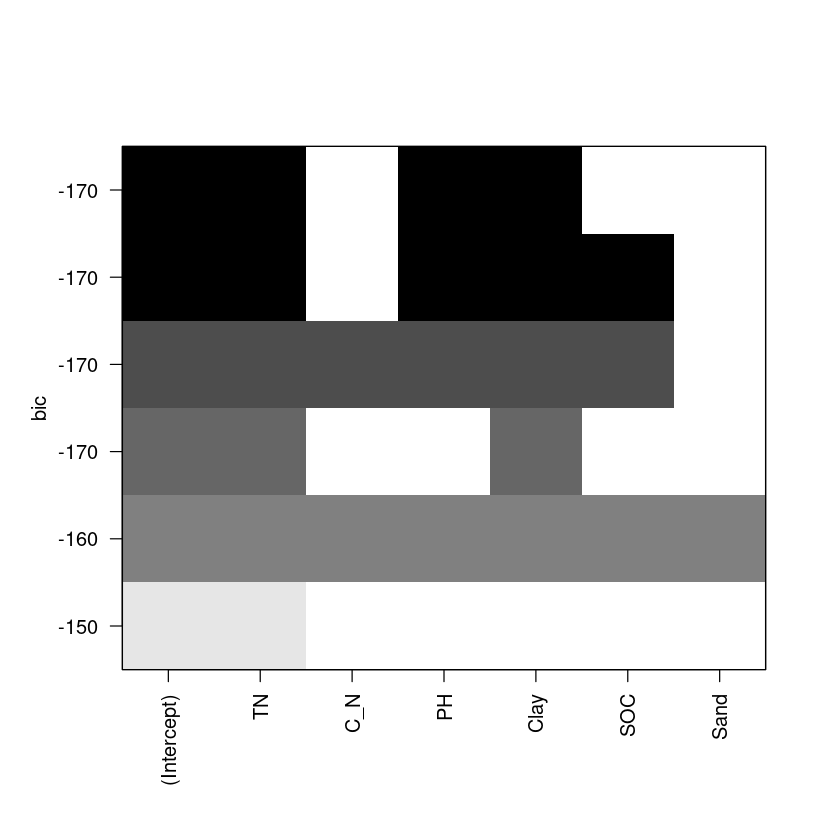

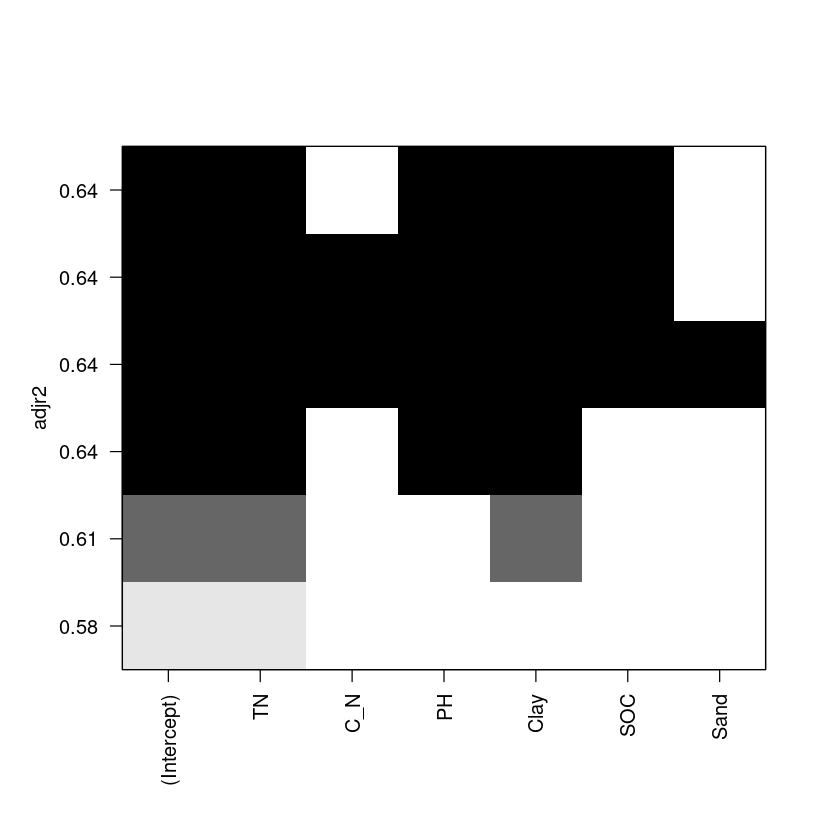

In [92]:
## trace le critère d'information ici le BIC (équivalent du AIC)
## pour ce critère on va retenir la combinaison des variables qui minimise la valeur du BIC
## pour un autre critère come le R2 ajusté on va retenir la combinaison qui maximise la valeur
plot(choix_variables, scale=c("bic"))
plot(choix_variables, scale=c("adjr2"))

#####################################################################################################################
## Question : vue les résultats avec ces deux critères quelles sont les variables et donc le modèle sélectionné ?
#####################################################################################################################

In [96]:
## prenons par exemple le modèle Biomasse = fn(TN,PH,Clay,Biomasse)
mydfmlm <- lm(Biomasse~TN+PH+Clay+SOC, data = training_mydf)
summary(mydfmlm)


Call:
lm(formula = Biomasse ~ TN + PH + Clay + SOC, data = training_mydf)

Residuals:
     Min       1Q   Median       3Q      Max 
-107.590  -13.185    0.748   13.081  119.459 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  57.8375    24.7593   2.336 0.020569 *  
TN           24.1477     2.2142  10.906  < 2e-16 ***
PH          -11.6618     3.2119  -3.631 0.000366 ***
Clay          1.0408     0.2265   4.595 8.01e-06 ***
SOC           0.5162     0.2595   1.989 0.048173 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.01 on 184 degrees of freedom
Multiple R-squared:  0.6508,	Adjusted R-squared:  0.6432 
F-statistic: 85.71 on 4 and 184 DF,  p-value: < 2.2e-16


In [97]:
## Qu'en déduisez vous quand au score du modèle multilinéaire comparativement au modèle linéaire simple ?
## Evaluer la performance du modèle en vous appuyant sur l'échantillon de contrôle

control_varselect <- control_mydf[,c("TN", "PH", "Clay", "SOC", "Biomasse")]
head(control_varselect)
control_mydf$Biomassepredmlm <- predict.lm(mydfmlm, control_varselect)

,TN,PH,Clay,SOC,Biomasse
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
67,2.12,8.09,36.0,21.3,2.7
106,1.59,8.40,35.3,33.6,62.0
99,5.03,7.91,46.4,57.4,240.0
139,2.02,8.27,20.2,21.4,49.0
144,1.44,5.09,8.0,20.3,88.0
165,1.62,8.32,42.8,15.3,26.0


In [82]:
head(control_mydf)

,field_1,annee,SOC,TN,C_N,PH,Clay,Sand,XLB93,YLB93,cat_cultur,Categories,Shannon,Evenness,X1.Simpson,Biomasse,Biomassepredict,Biomassepredmlm
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
67,Py_162_2011,2011,21.3,2.12,10.10,8.09,36.0,11.9,855273.5,6683443,Hiver,Decompactage,5.827,0.797213,104.450,2.7,62.78861,61.11516
106,Py_200_2011,2011,33.6,1.59,21.20,8.40,35.3,9.1,858068.6,6683873,Brassicacees,Travail_intermediaire,5.636,0.787162,98.660,62.0,94.47162,52.31391
99,Py_193_2011,2011,57.4,5.03,11.40,7.91,46.4,11.4,853982.4,6683872,Foret,pas_de_travail,5.032,0.720297,27.540,240.0,155.77696,155.88990
139,Py_231_2011,2011,21.4,2.02,10.60,8.27,20.2,11.3,856994.2,6684089,Ete,Labour,5.708,0.786646,89.534,49.0,63.04619,56.95756
144,Py_236_2011,2011,20.3,1.44,14.10,5.09,8.0,5.8,854197.4,6684302,Foret,pas_de_travail,4.683,0.685990,20.619,88.0,60.21275,73.00306
165,Py_257_2011,2011,15.3,1.62,9.44,8.32,42.8,7.2,855273.0,6684518,Brassicacees,Labour,5.500,0.777977,77.200,26.0,47.33348,43.01124


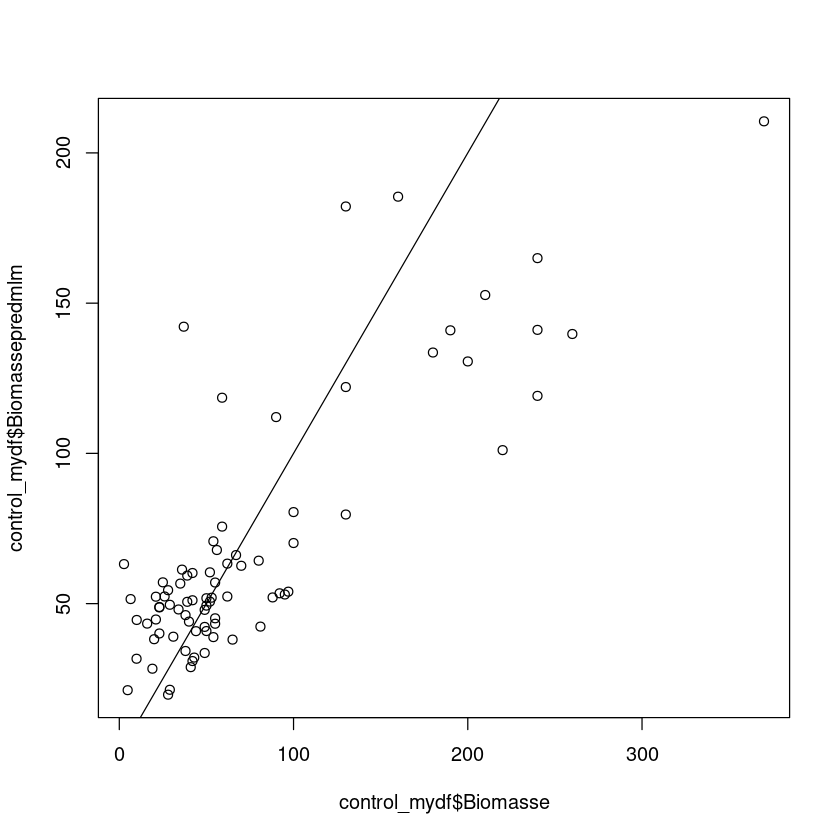

In [98]:
## Trace SOC mesuré vs SOC prédit par le modèle multi-linéaire
plot(control_mydf$Biomasse, control_mydf$Biomassepredmlm) ## scatterplot
abline(0,1) ## trace la droite 1:1

In [99]:
## Evaluataion de la qualité du modèle multi-linéaire
cor(control_mydf$Biomasse,control_mydf$Biomassepredmlm) ## coef corrélation linéaire
(cor(control_mydf$Biomasse,control_mydf$Biomassepredmlm))^2 ## coef détermination
RMSE <- sqrt(sum((control_mydf$Biomasse-control_mydf$Biomassepredmlm)^2)/dim(control_mydf)[1])
RMSE

[1] 0.8282656

[1] 0.6860238

[1] 42.92735

In [101]:
###############################################
##
## Contribution des variables
## utilisation de la fonction calc.relimp du package relaimpo
###############################################
reg.mlm <- lm(Biomasse ~ TN + PH + Clay + SOC, data = mydf)
regrelimpo <- calc.relimp(reg.mlm, type = c("lmg","pratt", "genizi","car"),
                          rela = TRUE, rank = TRUE)
summary(reg.mlm)


Call:
lm(formula = Biomasse ~ TN + PH + Clay + SOC, data = mydf)

Residuals:
     Min       1Q   Median       3Q      Max 
-135.575  -15.192    0.731   14.740  122.472 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  80.0664    22.0988   3.623 0.000349 ***
TN           21.6055     2.3009   9.390  < 2e-16 ***
PH          -15.2759     2.8978  -5.271 2.82e-07 ***
Clay          0.8549     0.2124   4.025 7.46e-05 ***
SOC           1.3916     0.2416   5.760 2.33e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.47 on 264 degrees of freedom
Multiple R-squared:  0.6707,	Adjusted R-squared:  0.6657 
F-statistic: 134.4 on 4 and 264 DF,  p-value: < 2.2e-16


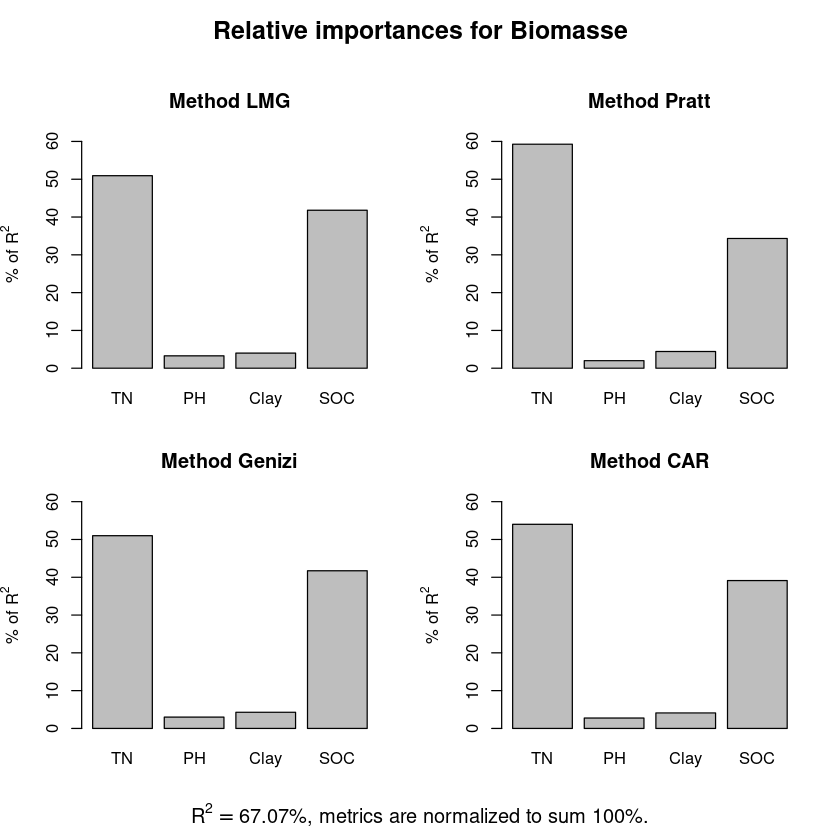

In [102]:
plot(regrelimpo)

In [105]:
#############################################
## Que dire de ces résultats ?
############################################

## Calcul de la Biomasse prédit par le modèle
mydata$Biomassepredmlm <- predict.lm(reg.mlm, mydf[,c("TN", "PH", "Clay", "SOC")])


In [106]:
class(mydata)
getwd()

[1] "sf"         "data.frame"

[1] "/home/thierry/works/R4R2D2C_2022_2023/BData"

In [107]:
## exporte mydata qui est un objet sf dans R en un fichier SIG shapefile lisible par QGIS
st_write(mydata, "newptsampleFenayL93.shp", delete_layer = TRUE)

Warning message in abbreviate_shapefile_names(obj):
“Field names abbreviated for ESRI Shapefile driver”


Deleting layer `newptsampleFenayL93' using driver `ESRI Shapefile'
Writing layer `newptsampleFenayL93' to data source 
  `newptsampleFenayL93.shp' using driver `ESRI Shapefile'
Writing 269 features with 17 fields and geometry type Point.


In [108]:
## Allez ouvrir cette nouvelle couche/carte avec QGIS
## Faire la carte des différences entre Biomasse mesurée et Biomasse prédite par le modèle multi-linéaire